In [1]:
!pip install -q transformers datasets accelerate

In [2]:
from transformers import Blip2VisionConfig, Blip2QFormerConfig, OPTConfig, Blip2Config, Blip2ForConditionalGeneration

configuration = Blip2Config()
model = Blip2ForConditionalGeneration(configuration)
configuration = model.config

In [3]:
print(configuration)

Blip2Config {
  "initializer_factor": 1.0,
  "initializer_range": 0.02,
  "model_type": "blip-2",
  "num_query_tokens": 32,
  "qformer_config": {
    "model_type": "blip_2_qformer"
  },
  "text_config": {
    "model_type": "opt"
  },
  "transformers_version": "4.35.0",
  "use_decoder_only_language_model": true,
  "vision_config": {
    "model_type": "blip_2_vision_model"
  }
}



In [4]:
from transformers import Blip2VisionModel

configuration_vision = Blip2VisionConfig()
model = Blip2VisionModel(configuration_vision)
configuration_2 = model.config

In [5]:
print(configuration_2)

Blip2VisionConfig {
  "attention_dropout": 0.0,
  "hidden_act": "gelu",
  "hidden_size": 1408,
  "image_size": 224,
  "initializer_range": 1e-10,
  "intermediate_size": 6144,
  "layer_norm_eps": 1e-06,
  "model_type": "blip_2_vision_model",
  "num_attention_heads": 16,
  "num_hidden_layers": 39,
  "patch_size": 14,
  "qkv_bias": true,
  "transformers_version": "4.35.0"
}



In [6]:
model

Blip2VisionModel(
  (embeddings): Blip2VisionEmbeddings(
    (patch_embedding): Conv2d(3, 1408, kernel_size=(14, 14), stride=(14, 14))
  )
  (encoder): Blip2Encoder(
    (layers): ModuleList(
      (0-38): 39 x Blip2EncoderLayer(
        (self_attn): Blip2Attention(
          (dropout): Dropout(p=0.0, inplace=False)
          (qkv): Linear(in_features=1408, out_features=4224, bias=True)
          (projection): Linear(in_features=1408, out_features=1408, bias=True)
        )
        (layer_norm1): LayerNorm((1408,), eps=1e-06, elementwise_affine=True)
        (mlp): Blip2MLP(
          (activation_fn): GELUActivation()
          (fc1): Linear(in_features=1408, out_features=6144, bias=True)
          (fc2): Linear(in_features=6144, out_features=1408, bias=True)
        )
        (layer_norm2): LayerNorm((1408,), eps=1e-06, elementwise_affine=True)
      )
    )
  )
  (post_layernorm): LayerNorm((1408,), eps=1e-06, elementwise_affine=True)
)

In [7]:
from PIL import Image
import requests
from transformers import Blip2Processor
import torch

device = 'cuda' if torch.cuda.is_available() else 'cpu'

In [8]:
processor = Blip2Processor.from_pretrained('Salesforce/blip2-opt-2.7b')
model = Blip2ForConditionalGeneration.from_pretrained('Salesforce/blip2-opt-2.7b', torch_dtype=torch.float16)
model.to(device)

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

Blip2ForConditionalGeneration(
  (vision_model): Blip2VisionModel(
    (embeddings): Blip2VisionEmbeddings(
      (patch_embedding): Conv2d(3, 1408, kernel_size=(14, 14), stride=(14, 14))
    )
    (encoder): Blip2Encoder(
      (layers): ModuleList(
        (0-38): 39 x Blip2EncoderLayer(
          (self_attn): Blip2Attention(
            (dropout): Dropout(p=0.0, inplace=False)
            (qkv): Linear(in_features=1408, out_features=4224, bias=True)
            (projection): Linear(in_features=1408, out_features=1408, bias=True)
          )
          (layer_norm1): LayerNorm((1408,), eps=1e-06, elementwise_affine=True)
          (mlp): Blip2MLP(
            (activation_fn): GELUActivation()
            (fc1): Linear(in_features=1408, out_features=6144, bias=True)
            (fc2): Linear(in_features=6144, out_features=1408, bias=True)
          )
          (layer_norm2): LayerNorm((1408,), eps=1e-06, elementwise_affine=True)
        )
      )
    )
    (post_layernorm): LayerNorm((

In [9]:
url = 'https://pbs.twimg.com/media/F_yUbdtWwAAb-m2?format=jpg&name=small'
image = Image.open(requests.get(url, stream=True).raw)

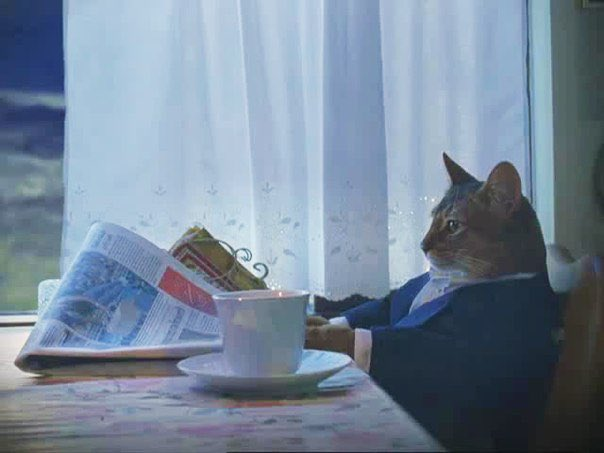

In [10]:
image

In [11]:
inputs = processor(images=image, return_tensors='pt').to(device, torch.float16)

In [12]:
inputs

{'pixel_values': tensor([[[[-1.1504, -1.1504, -1.1504,  ..., -1.2812, -1.3105, -1.3545],
          [-1.1641, -1.1641, -1.1641,  ..., -1.0332, -1.0625, -1.1064],
          [-1.1934, -1.1934, -1.1934,  ..., -0.8579, -0.9165, -0.9746],
          ...,
          [-0.7559, -0.7705, -0.7559,  ..., -1.5000, -1.5000, -1.4854],
          [-0.7705, -0.7705, -0.7705,  ..., -1.5439, -1.5439, -1.5146],
          [-0.9165, -0.9165, -0.9165,  ..., -1.5586, -1.5586, -1.5439]],

         [[-0.8364, -0.8364, -0.8364,  ..., -1.0771, -1.1064, -1.1514],
          [-0.8516, -0.8516, -0.8516,  ..., -0.8218, -0.8516, -0.8965],
          [-0.8818, -0.8818, -0.8818,  ..., -0.6416, -0.7017, -0.7617],
          ...,
          [-0.6714, -0.6865, -0.6714,  ..., -1.3916, -1.3916, -1.3770],
          [-0.6865, -0.6865, -0.6865,  ..., -1.4365, -1.4365, -1.4072],
          [-0.8364, -0.8364, -0.8364,  ..., -1.4521, -1.4521, -1.4365]],

         [[-0.1862, -0.2289, -0.2430,  ..., -0.8262, -0.8545, -0.8970],
          [-0

In [13]:
generated_ids = model.generate(**inputs)
generated_text = processor.batch_decode(generated_ids, skip_special_tokens=True)[0].strip()
print(generated_text)

/opt/conda/lib/python3.10/site-packages/transformers/generation/utils.py:1273: UserWarning: Using the model-agnostic default `max_length` (=20) to control the generation length. We recommend setting `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(


a cat in a suit sitting at a table with a cup of coffee


In [14]:
prompt = 'Question: What is unusual about the image? Answer: '
inputs = processor(images=image, text=prompt, return_tensors='pt').to(device)

generated_ids = model.generate(**inputs)
generated_answer = processor.batch_decode(generated_ids, skip_special_tokens=True)[0].strip()
print(prompt, generated_answer)

Question: What is unusual about the image? Answer:  


In [15]:
prompt = 'A cat is not supposed '
inputs = processor(images=image, text=prompt, return_tensors='pt').to(device)

generated_ids = model.generate(**inputs)
generated_answer = processor.batch_decode(generated_ids, skip_special_tokens=True)[0].strip()
print(prompt, generated_answer)

A cat is not supposed  to be reading a newspaper
